![](OptimumG2018.png)
# Bicycle Model Exercises
## Step and impulse response for Neutral, Over and Under Steer

The following code shows how to you can used python to run vehicle dynamics simulation.
 In this example we simulate 3 different vehicles:
 
 * Vehicle A - Understeer vehicle
 * Vehicle B - Neutral steer vehicle
 * Vehicle C - Oversteer vehicle
 * For each vehicle we will simulate a step and impulse response
 * Plot the results


In [ ]:
from IPython import get_ipython
from scipy import signal
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

The above statement import 3 libraries that we will be using in this example:


* scipy - Library for scientific computing - It contains the functions that allows us to 
create a state space model and run step, impulse responses.
* numpy - Base N-dimensional array package - Library that allows us to create matrixes and vectors
* matplolib - 2D Plotting tool - Library that allows the user to plot

For more information on these package please visit the following link: https://www.scipy.org/


In [2]:
vx = 10

## Understeer vehicle


In [3]:
m = 1000.0 #Kg
C_alpha_f = 60000.0 #N/rad
C_alpha_r = 60000.0 #N/rad
Izz = 1650.0 #kg m^2
a = 1.0 #m
b = 1.5 #m

A = np.array(
    [
        [-(C_alpha_f + C_alpha_r) / (m * vx),           (-a * C_alpha_f + b * C_alpha_r) / (m*vx) - vx],
        [-(a * C_alpha_f - b * C_alpha_r) / (Izz * vx),   -(a**2 * C_alpha_f + b**2 * C_alpha_r) / (Izz*vx)]
    ]
            )

B = np.array(
    [
        [C_alpha_f/m],
        [(a * C_alpha_f) / Izz]
    ]
)

C = np.array(
    [
        [1,0],
        [0,1]
    ]
)

D = np.array([[0],[0]])

sys_A = signal.StateSpace(A,B,C,D)

## Neutral steer vehicle


In [4]:
m = 1000.0 #Kg
C_alpha_f = 60000.0 #N/rad
C_alpha_r = 60000.0 #N/rad
Izz = 1650.0 #kg m^2
a = 1.25 #m
b = 1.25 #m

A = np.array(
    [
        [-(C_alpha_f + C_alpha_r) / (m * vx),           (-a * C_alpha_f + b * C_alpha_r) / (m*vx) - vx],
        [-(a * C_alpha_f - b * C_alpha_r) / (Izz * vx),   -(a**2 * C_alpha_f + b**2 * C_alpha_r) / (Izz*vx)]
    ]
            )

B = np.array(
    [
        [C_alpha_f/m],
        [(a * C_alpha_f) / Izz]
    ]
)

C = np.array(
    [
        [1,0],
        [0,1]
    ]
)

D = np.array([[0],[0]])

sys_B = signal.StateSpace(A,B,C,D)

## Oversteer vehicle


In [5]:
m = 1000.0 #Kg
C_alpha_f = 60000.0 #N/rad
C_alpha_r = 60000.0 #N/rad
Izz = 1650.0 #kg m^2
a = 1.5 #m
b = 1.0 #m

A = np.array(
    [
        [-(C_alpha_f + C_alpha_r) / (m * vx),           (-a * C_alpha_f + b * C_alpha_r) / (m*vx) - vx],
        [-(a * C_alpha_f - b * C_alpha_r) / (Izz * vx),   -(a**2 * C_alpha_f + b**2 * C_alpha_r) / (Izz*vx)]
    ]
            )

B = np.array(
    [
        [C_alpha_f/m],
        [(a * C_alpha_f) / Izz]
    ]
)

C = np.array(
    [
        [1,0],
        [0,1]
    ]
)

D = np.array([[0],[0]])

sys_C = signal.StateSpace(A,B,C,D)

## Simulation and Analysis

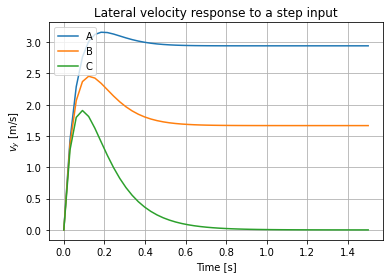

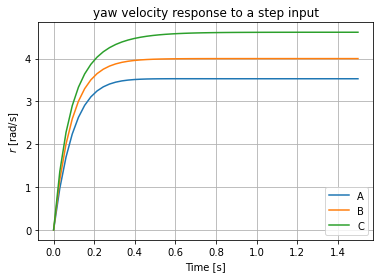

In [6]:
t_A,y_A = signal.step(sys_A, T=np.linspace(0,1.5,50))
t_B,y_B = signal.step(sys_B, T=np.linspace(0,1.5,50))
t_C,y_C = signal.step(sys_C, T=np.linspace(0,1.5,50))

vy_A = y_A[:,0]
r_A = y_A[:,1]

vy_B = y_B[:,0]
r_B = y_B[:,1]

vy_C = y_C[:,0]
r_C = y_C[:,1]

# Plot lateral velocity
plt.figure()
plt.plot(t_A,vy_A)
plt.plot(t_B,vy_B)
plt.plot(t_C,vy_C)
plt.title("Lateral velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$v_y$ [m/s]")
plt.legend(["A","B","C"])
plt.grid(True)

# Plot the yaw rate
plt.figure()
plt.plot(t_A,r_A)
plt.plot(t_B,r_B)
plt.plot(t_C,r_C)
plt.title("yaw velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$r$ [rad/s]")
plt.legend(["A","B","C"])
plt.grid(True)

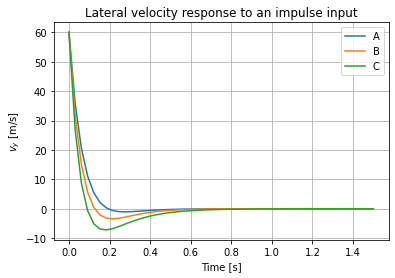

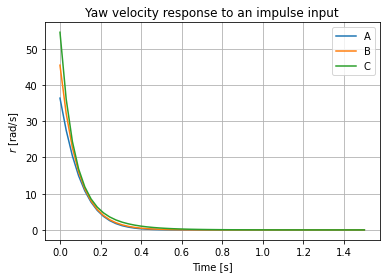

In [8]:
t_A,y_A = signal.impulse(sys_A, T=np.linspace(0,1.5,50))
t_B,y_B = signal.impulse(sys_B, T=np.linspace(0,1.5,50))
t_C,y_C = signal.impulse(sys_C, T=np.linspace(0,1.5,50))

vy_A = y_A[:,0]
r_A = y_A[:,1]

vy_B = y_B[:,0]
r_B = y_B[:,1]

vy_C = y_C[:,0]
r_C = y_C[:,1]

# Plot lateral velocity
plt.figure()
plt.plot(t_A,vy_A)
plt.plot(t_B,vy_B)
plt.plot(t_C,vy_C)
plt.title("Lateral velocity response to an impulse input")
plt.xlabel("Time [s]")
plt.ylabel("$v_y$ [m/s]")
plt.legend(["A","B","C"])
plt.grid(True)

# Plot the yaw rate
plt.figure()
plt.plot(t_A,r_A)
plt.plot(t_B,r_B)
plt.plot(t_C,r_C)
plt.title("Yaw velocity response to an impulse input")
plt.xlabel("Time [s]")
plt.ylabel("$r$ [rad/s]")
plt.legend(["A","B","C"])
plt.grid(True)

Author: Joao Antunes

Date: May, 2020